# Data Visualisation

## Import Required Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import copy
import math

## Import Data

In [2]:
demand_df = pd.read_csv('demand.csv', parse_dates=['Date'])
demand_df.head()

,Date,Building0,Building1,Building3,Building4,Building5,Building6,Solar0,Solar1,Solar2,Solar3,Solar4,Solar5
0,2016-07-03 21:30:00,283.8,NaN,581.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-07-03 21:45:00,283.8,NaN,581.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-07-03 22:00:00,283.8,NaN,581.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-07-03 22:15:00,606.0,NaN,624.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-07-03 22:30:00,606.0,NaN,624.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
price_df = pd.read_csv('price.csv', parse_dates=['Date'])
price_df.head()

,Date,TOTALDEMAND,RRP
0,2020-10-01 00:30:00,4670.40,39.09
1,2020-10-01 01:00:00,4513.84,38.39
2,2020-10-01 01:30:00,4329.71,36.46
3,2020-10-01 02:00:00,4146.21,35.79
4,2020-10-01 02:30:00,4003.90,33.65


In [4]:
weather_df = pd.read_csv('weather.csv', parse_dates=['Date'])
weather_df.head()

,Date,olympic_max_temp,moorabbin_max_temp,olympic_min_temp,moorabbin_min_temp,olympic_rain,oakleigh_rain,moorabbin_rain,olympic_solar,oakleigh_solar,moorabbin_solar
0,2013-01-01,NaN,22.8,NaN,13.3,NaN,0.0,0.0,31.1,30.5,29.4
1,2013-01-02,NaN,20.5,NaN,12.6,NaN,0.0,0.0,31.9,32.8,33.0
2,2013-01-03,NaN,36.5,NaN,12.0,NaN,0.0,0.0,32.8,32.2,31.9
3,2013-01-04,NaN,41.5,NaN,18.6,NaN,0.0,0.0,33.5,33.6,33.6
4,2013-01-05,NaN,26.2,NaN,18.8,NaN,0.0,0.0,30.5,31.4,29.6


## Data Visualisation

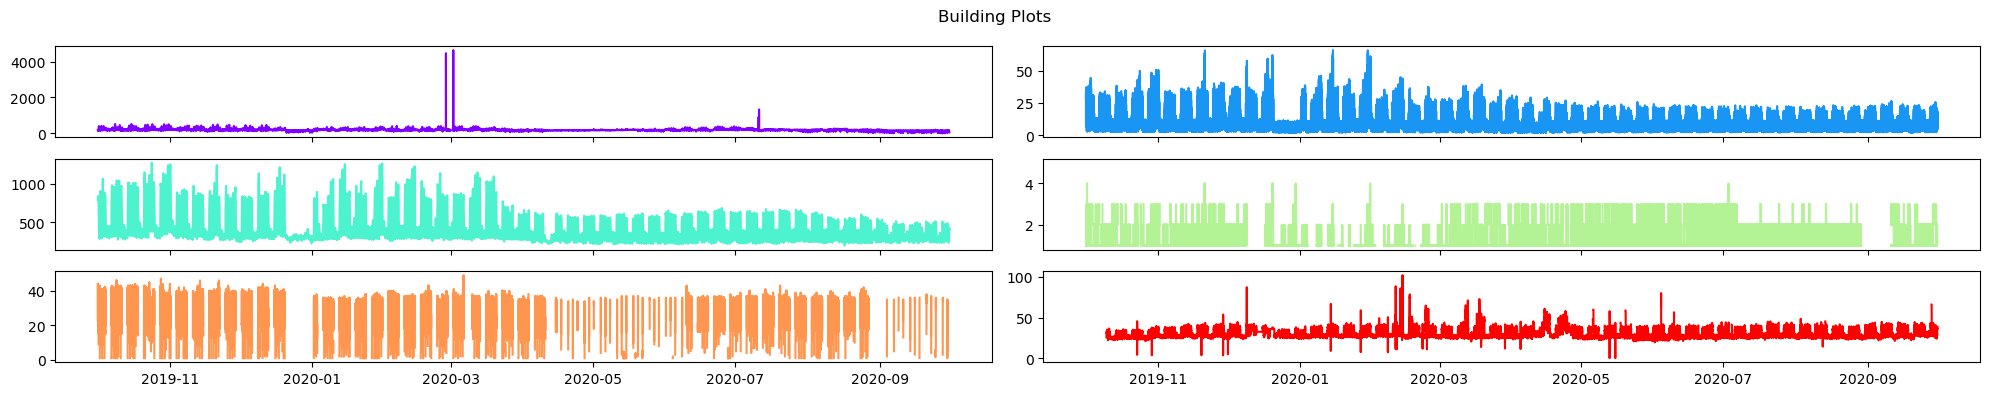

In [5]:
#Plot Building Demand

#generate start and end dates
start_date = '2019-09-30 23:45:00'
end_date = '2020-09-30 23:45:00'
mask = (demand_df['Date'] > start_date) & (demand_df['Date'] <= end_date)

#create figure and subplots
fig, axes = plt.subplots(3, 2, figsize=(20, 4), sharex=True)
color=cm.rainbow(np.linspace(0,1,6))
for col, ax, c in zip([col for col in demand_df.columns if "Building" in col], axes.flatten(), color):
    ax.plot(demand_df.loc[mask]['Date'], demand_df.loc[mask][col], color=c)
fig.suptitle("Building Plots")
fig.tight_layout()
plt.show()

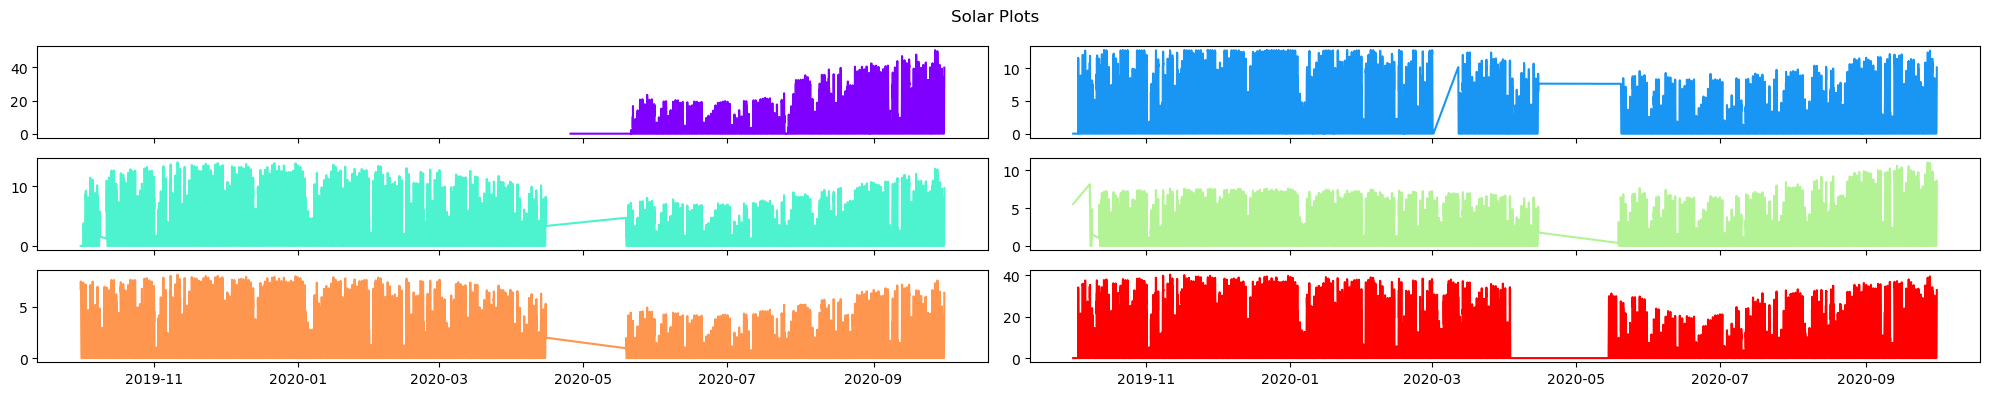

In [6]:
#Plot Solar Power

#generate start and end dates
start_date = '2019-09-30 23:45:00'
end_date = '2020-09-30 23:45:00'
mask = (demand_df['Date'] > start_date) & (demand_df['Date'] <= end_date)

#create figure and subplots
fig, axes = plt.subplots(3, 2, figsize=(20, 4), sharex=True)
color=cm.rainbow(np.linspace(0,1,6))
for col, ax, c in zip([col for col in demand_df.columns if "Solar" in col], axes.flatten(), color):
    ax.plot(demand_df.loc[mask]['Date'], demand_df.loc[mask][col], color=c)
fig.suptitle("Solar Plots")
fig.tight_layout()
plt.show()

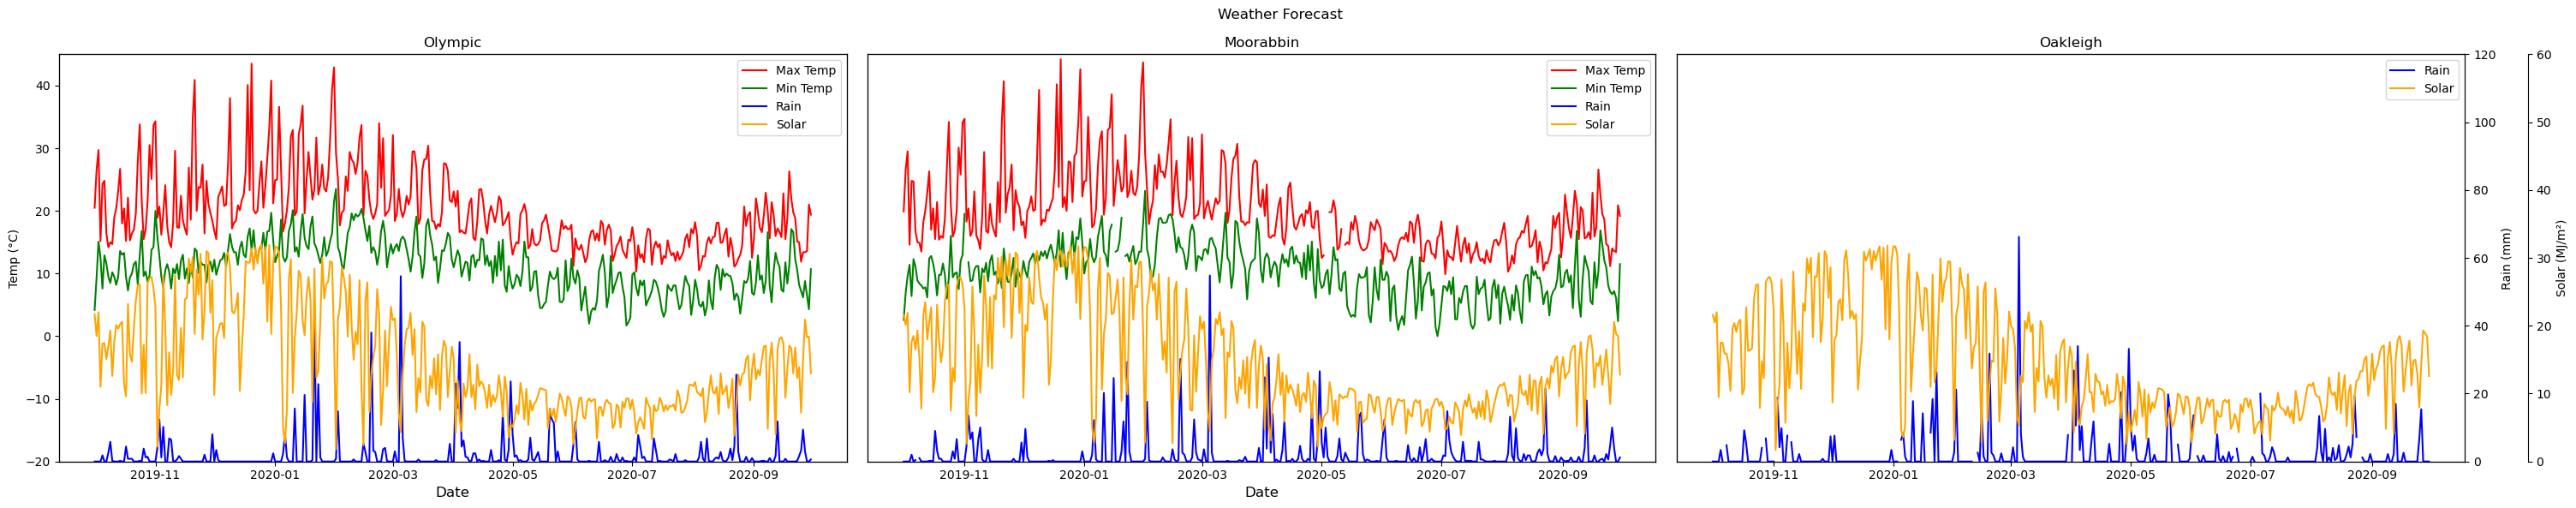

In [7]:
#Plot Weather Forecast

#generate start and end dates
start_date = '2019-09-30'
end_date = '2020-09-30'
mask = (weather_df['Date'] > start_date) & (weather_df['Date'] <= end_date)

#create figure and subplots
fig, ax = plt.subplots(1, 3, figsize=(30, 6))

#olympic plot
line1 = ax[0].plot(weather_df.loc[mask]['Date'], weather_df.loc[mask]['olympic_max_temp'], color='red', label="Max Temp")
line2 = ax[0].plot(weather_df.loc[mask]['Date'], weather_df.loc[mask]['olympic_min_temp'], color='green', label="Min Temp")
ax[0].set_xlabel("Date", fontsize=12)
ax[0].set_ylim(-20, 45)

ax1 = ax[0].twinx()
line3 = ax1.plot(weather_df.loc[mask]['Date'], weather_df.loc[mask]['olympic_rain'], color='blue', label="Rain")
ax1.set_ylim(0, 120)
    
ax2 = ax[0].twinx()
line4 = ax2.plot(weather_df.loc[mask]['Date'], weather_df.loc[mask]['olympic_solar'], color='orange', label="Solar")
ax2.set_ylim(0, 60)

lines = line1+line2+line3+line4
labels = [l.get_label() for l in lines]
ax[0].legend(lines, labels, loc='best')
ax[0].set_title("Olympic")

#moorabbin plot
line1 = ax[1].plot(weather_df.loc[mask]['Date'], weather_df.loc[mask]['moorabbin_max_temp'], color='red', label="Max Temp")
line2 = ax[1].plot(weather_df.loc[mask]['Date'], weather_df.loc[mask]['moorabbin_min_temp'], color='green', label="Min Temp")
ax[1].set_xlabel("Date", fontsize=12)
ax[1].set_ylim(-20, 45)

ax3 = ax[1].twinx()
line3 = ax3.plot(weather_df.loc[mask]['Date'], weather_df.loc[mask]['moorabbin_rain'], color='blue', label="Rain")
ax3.set_ylim(0, 120)
    
ax4 = ax[1].twinx()
line4 = ax4.plot(weather_df.loc[mask]['Date'], weather_df.loc[mask]['moorabbin_solar'], color='orange', label="Solar")
ax4.set_ylim(0, 60)

lines = line1+line2+line3+line4
labels = [l.get_label() for l in lines]
ax[1].legend(lines, labels, loc='best')
ax[1].set_title("Moorabbin")

#oakleigh plot
ax5 = ax[2].twinx()
line1 = ax5.plot(weather_df.loc[mask]['Date'], weather_df.loc[mask]['oakleigh_rain'], color='blue', label="Rain")
ax5.set_ylim(0, 120)

ax6 = ax[2].twinx()
line2 = ax6.plot(weather_df.loc[mask]['Date'], weather_df.loc[mask]['oakleigh_solar'], color='orange', label="Solar")
ax6.spines['right'].set_position(('axes', 1.08))
ax6.set_ylim(0, 60)

lines = line1+line2
labels = [l.get_label() for l in lines]
ax[2].legend(lines, labels, loc='best')
ax[2].set_title("Oakleigh")

#format figure
ax[0].set_ylabel("Temp (°C)")
ax5.set_ylabel("Rain (mm)")
ax6.set_ylabel("Solar (MJ/m²)")
ax1.axes.yaxis.set_visible(False)
ax2.axes.yaxis.set_visible(False)
ax3.axes.yaxis.set_visible(False)
ax4.axes.yaxis.set_visible(False)
ax[1].axes.yaxis.set_visible(False)
ax[2].axes.yaxis.set_visible(False)
fig.suptitle('Weather Forecast')
fig.tight_layout()
plt.show()

### Smooth Peaks

In [8]:
from scipy.signal import find_peaks

In [9]:
def smooth_like_butter(peaks, ar):
    '''
    Input in a list with all the indexes that have peaks and returns an array with all 
    the indexes being smoothed by taking the mean of the previous and the next value
    '''
    arr = copy.copy(ar)
    for peak in peaks:
        i = 1
        j = 1
        while arr[peak + i] == arr[peak]:
            i += 1
        while arr[peak - j] == arr[peak]:
            j += 1
        val = (arr[peak + i] + arr[peak - j]) / 2
        arr[peak - j:peak + i] = val
    return arr

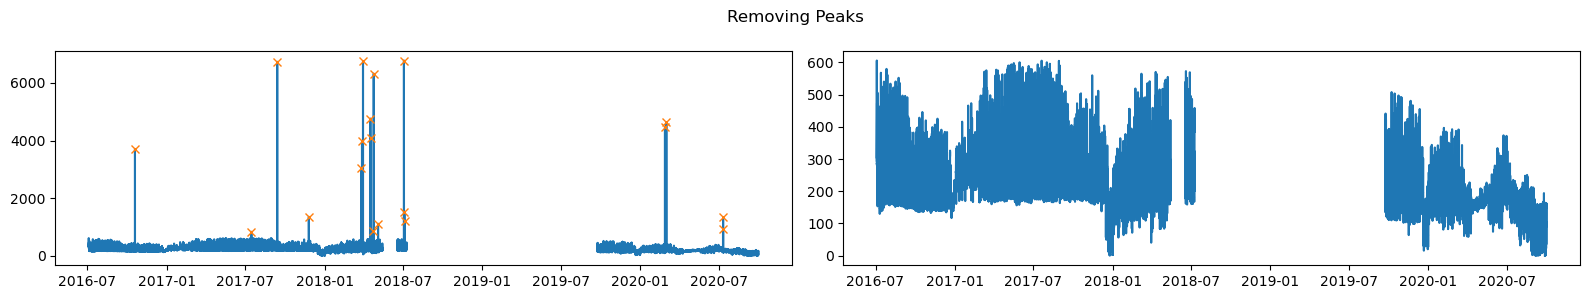

In [10]:
#Removing Peaks

#create figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(16,3))

#find peaks and append to array
peaks, _ = find_peaks(demand_df['Building0'], height=700)
Building0_peaks = np.zeros(len(demand_df))
Building0_peaks[:] = np.NaN
for i in peaks:
    Building0_peaks[i] = demand_df['Building0'][i]

#plot original with peaks
axs[0].plot(demand_df['Date'], demand_df['Building0'])
axs[0].plot(demand_df['Date'], Building0_peaks, "x")

#plot after applying function
demand_df['Building0'] = smooth_like_butter(peaks, demand_df['Building0'])
axs[1].plot(demand_df['Date'], demand_df['Building0'])

fig.suptitle("Removing Peaks")
fig.tight_layout()
plt.show()

### Fill Missing Values

number of 15 min intervals in year 1: 35040
number of 15 min intervals in year 2: 35040
number of 15 min intervals in year 3: 35040
number of 15 min intervals in year 4: 35136


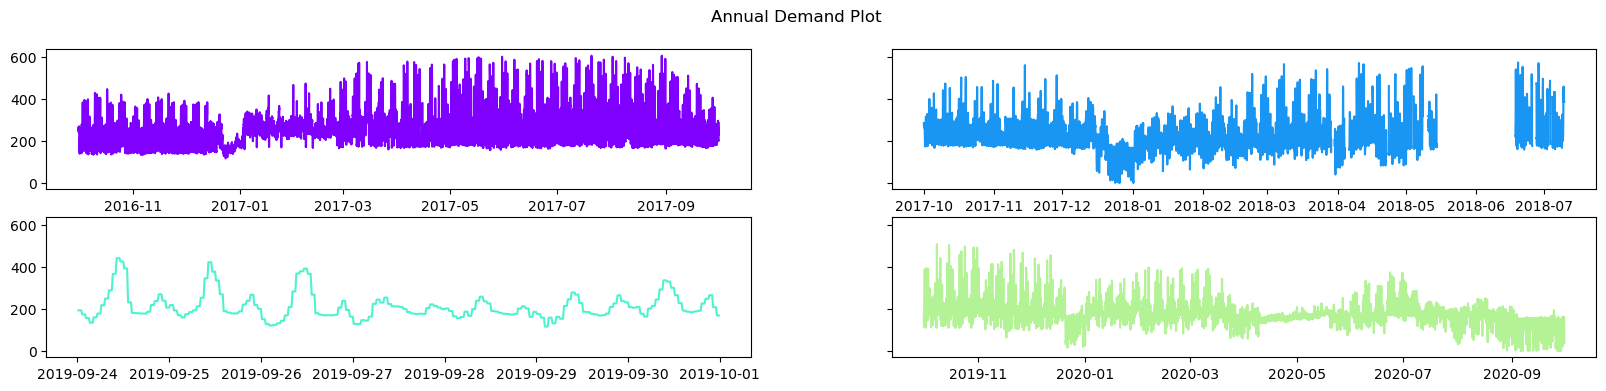

In [11]:
#create figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 4), sharey=True)
color=cm.rainbow(np.linspace(0,1,6))
years = ['2016', '2017', '2018', '2019', '2020']
i = 1
building_df = pd.DataFrame()
for ax, c in zip(axes.flatten(), color):
    #generate start and end dates
    start_date = years[i-1] + '-09-30 23:45:00'
    end_date = years[i] + '-09-30 23:45:00'
    mask = (demand_df['Date'] > start_date) & (demand_df['Date'] <= end_date)
    ax.plot(demand_df.loc[mask]['Date'], demand_df.loc[mask]['Building0'], color=c)
    building_df['year'+str(i)] = copy.copy(demand_df.loc[mask]['Building0'].reset_index(drop=True))
    print("number of 15 min intervals in year "+str(i)+": "+str(len(demand_df.loc[mask]['Building0'])))
    i += 1
fig.suptitle("Annual Demand Plot")
plt.show()

In [12]:
building_df.head()

,year1,year2,year3,year4
0,244.8,285.5,NaN,168.6
1,263.5,280.0,NaN,139.2
2,263.5,280.0,NaN,139.2
3,263.5,280.0,NaN,139.2
4,263.5,280.0,NaN,139.2


In [13]:
def fill_missing(df):
    arr = []
    for col in df.columns:
        df[col] = df[col].fillna(df.mean(axis=1))
        arr += list(df[col])
    return arr

In [14]:
start_date = '2016-09-30 23:45:00'
end_date = '2020-09-29 23:45:00' #decrease 1 day due to leap year
mask = (demand_df['Date'] > start_date) & (demand_df['Date'] <= end_date)
demand_df.loc[mask, 'Building0'] = fill_missing(building_df)
demand_df.head()

,Date,Building0,Building1,Building3,Building4,Building5,Building6,Solar0,Solar1,Solar2,Solar3,Solar4,Solar5
0,2016-07-03 21:30:00,283.8,NaN,581.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-07-03 21:45:00,283.8,NaN,581.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-07-03 22:00:00,283.8,NaN,581.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-07-03 22:15:00,606.0,NaN,624.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-07-03 22:30:00,606.0,NaN,624.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


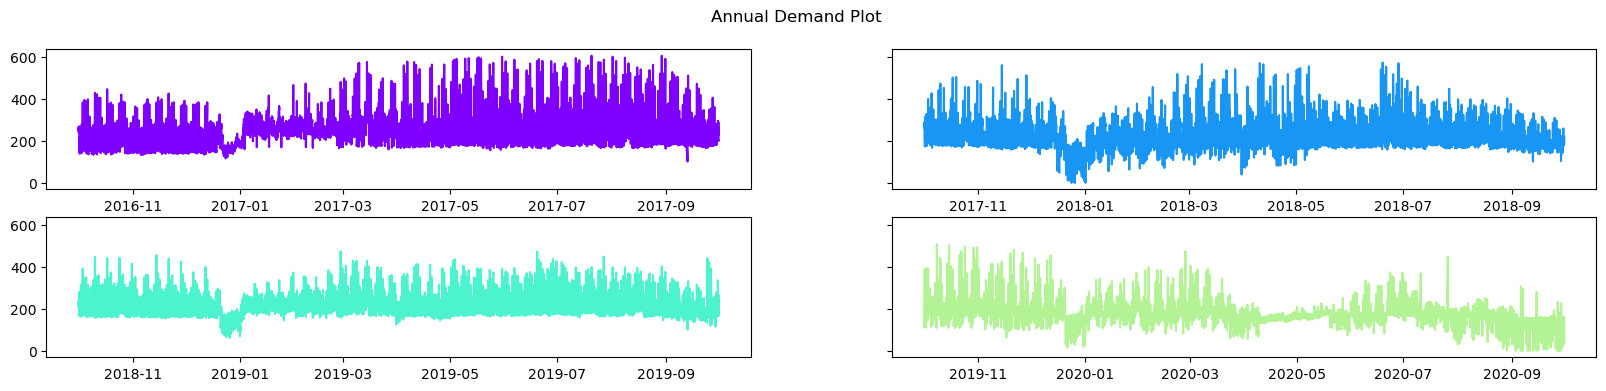

In [15]:
#create figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 4), sharey=True)
color=cm.rainbow(np.linspace(0,1,6))
years = ['2016', '2017', '2018', '2019', '2020']
i = 1
for ax, c in zip(axes.flatten(), color):
    #generate start and end dates
    start_date = years[i-1] + '-09-30 23:45:00'
    end_date = years[i] + '-09-30 23:45:00'
    mask = (demand_df['Date'] > start_date) & (demand_df['Date'] <= end_date)
    ax.plot(demand_df.loc[mask]['Date'], demand_df.loc[mask]['Building0'], color=c)
    i += 1
fig.suptitle("Annual Demand Plot")
plt.show()

## SARIMA Model

ARIMA Model is simple and flexible enough to capture relationship we would see in the data and It aims to explain the autocorrelation between the data points using past data. We can decompose the ARIMA model as follow to grab the key elements of it.

__AR: Auto regression.__ This is a model that uses the dependent relationship between the data and the lagged data.

__I: Integrated.__ The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.

__MA: Moving average.__ A model that uses the relationship between the observations and the residual error from the moving average model applied to lagged observations.

In [144]:
#generate start and end dates
start_date = '2016-09-30 23:45:00'
end_date = '2020-09-30 23:45:00'
mask = (demand_df['Date'] > start_date) & (demand_df['Date'] <= end_date)
ARIMA_df = demand_df.loc[mask][['Date', 'Building0']]
ARIMA_df.index = ARIMA_df['Date']
ARIMA_df = ARIMA_df.drop(['Date'], axis=1)
ARIMA_df = ARIMA_df.resample('D')['Building0'].sum()
ARIMA_df.tail()

Date
2020-09-26    10011.6
2020-09-27    10860.4
2020-09-28    10835.8
2020-09-29    11247.0
2020-09-30    11602.4
Freq: D, Name: Building0, dtype: float64

In [145]:
y_train = ARIMA_df[:len(ARIMA_df) - 30]
y_test = ARIMA_df[len(ARIMA_df) - 30:]

In [146]:
from statsmodels.tsa.stattools import adfuller

def get_stationarity(timeseries, window):
    #rolling statistics
    rolling_mean = timeseries.rolling(window=window).mean() #weekly rolling because 7 * 24 * 60 / 15
    rolling_std = timeseries.rolling(window=window).std()

    #rolling statistics plot
    plt.rcParams["figure.figsize"] = 20, 10
    original = plt.plot(timeseries, color='k', label='Original', alpha=.5)
    mean = plt.plot(rolling_mean, color='blue', label='Rolling Mean')
    std = plt.plot(rolling_std, color='red', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Rolling Standard Deviation')
    plt.show(block=False)

    #Dickey-Fuller test
    result = adfuller(timeseries)
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

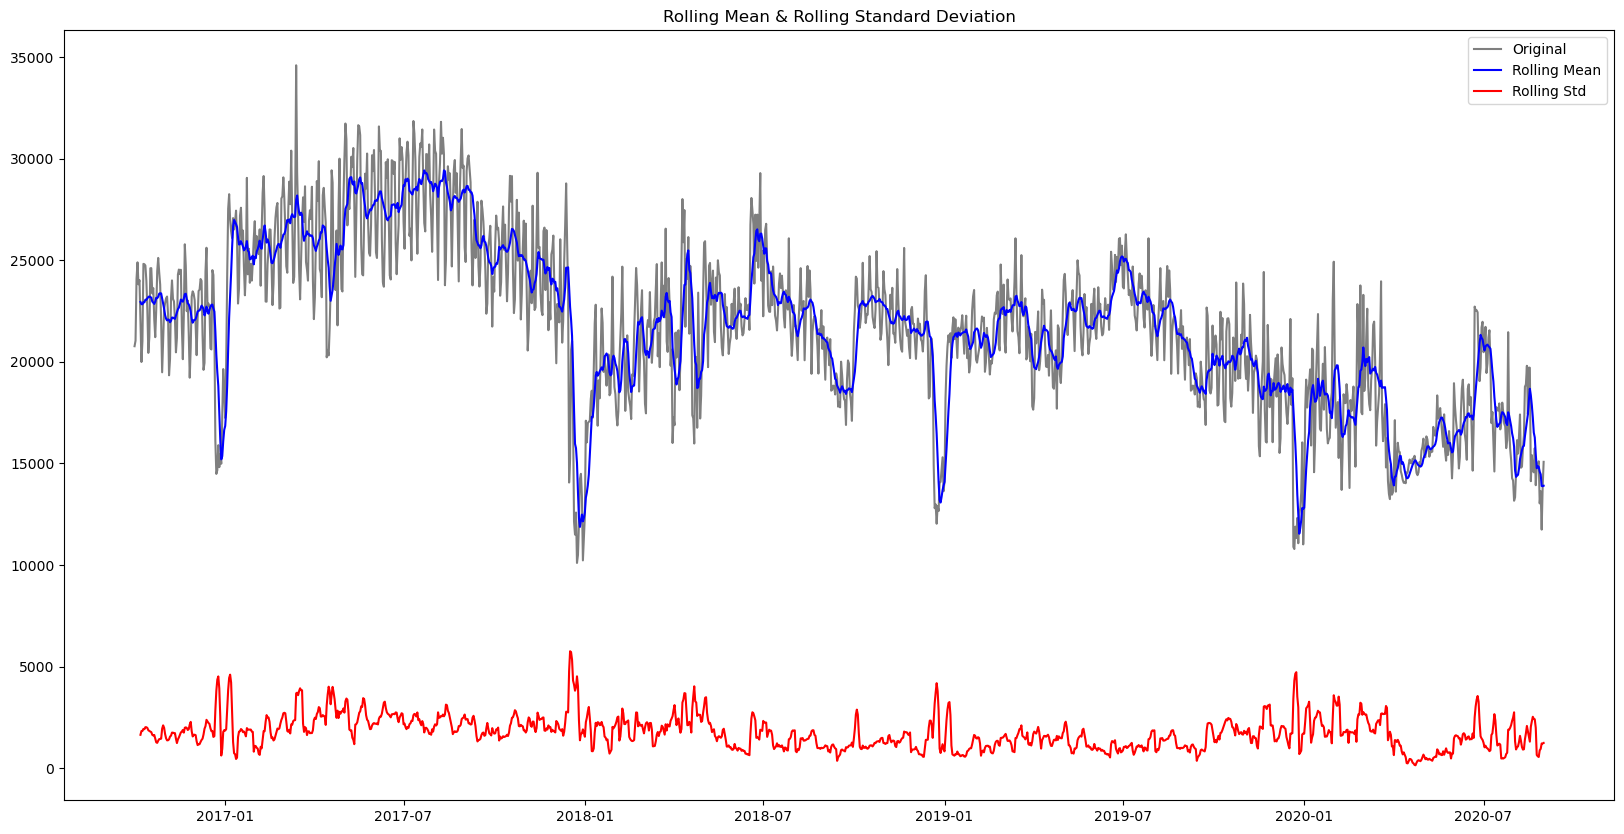

ADF Statistic: -2.2074362018233544
p-value: 0.2035576235960337
Critical Values:
	1%: -3.434999576596685
	5%: -2.8635934599975106
	10%: -2.5678632530961614


In [147]:
get_stationarity(y_train, 7)

### Training Model

Optimization terminated successfully.
         Current function value: 6.578591
         Iterations: 8
         Function evaluations: 505


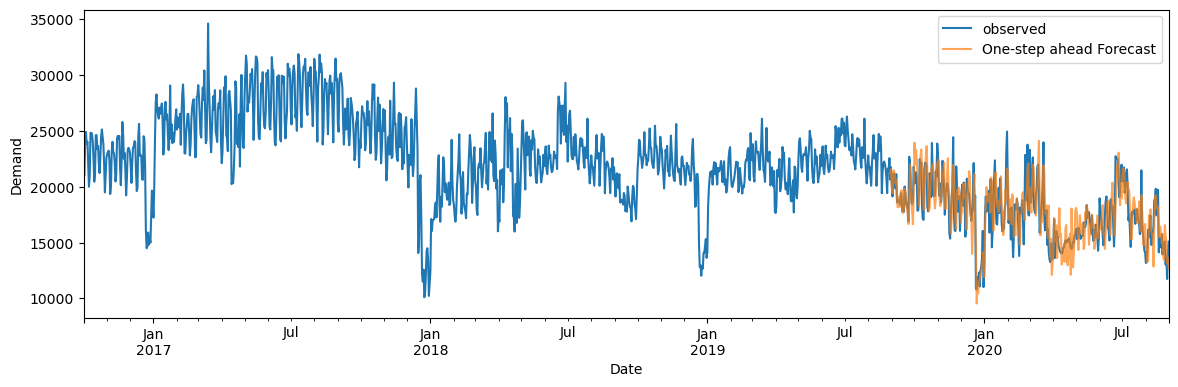

In [23]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(y_train, order=(1, 1, 1), seasonal_order=(1,1,1,365))
results=model.fit(method='powell', low_memory=True)
results.save('111-111-365_sarimax_building0.pkl')

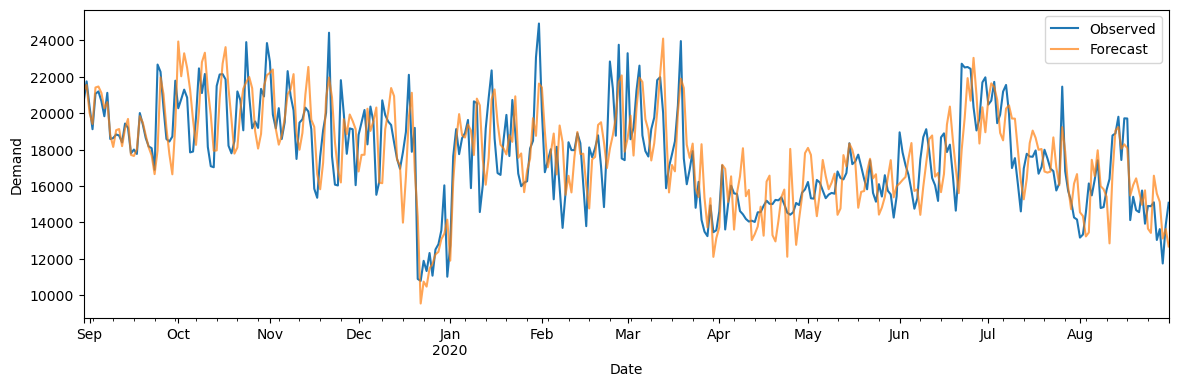

In [148]:
from statsmodels.tsa.statespace.sarimax import SARIMAXResults
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

loaded = SARIMAXResults.load('111-111-365_sarimax_building0.pkl')
pred=loaded.get_prediction(start=pd.to_datetime('2019-08-30'), dynamic=False)
pred_ci = pred.conf_int()
ax = y_train['2019-08-30':].plot(label='Observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Demand')
plt.legend()
plt.show()

### Future Forecast

In [149]:
from sklearn.metrics import mean_squared_error

y_forecasted = pred.predicted_mean
y_truth = y_train['2019-08-30':]
rmse = math.sqrt(mean_squared_error(y_truth, y_forecasted).mean())
print('The RMSE error of forecast prediction is {}'.format(round(rmse, 2)))

The RMSE error of forecast prediction is 1880.98


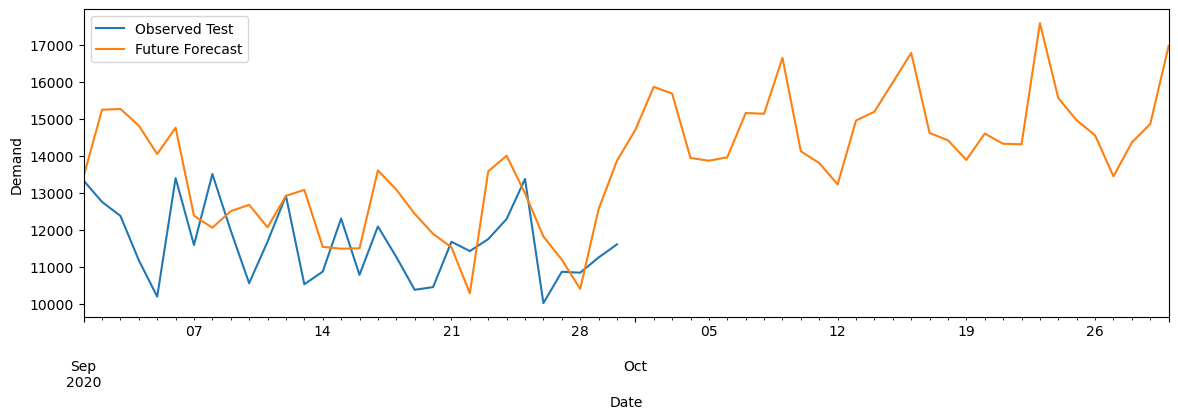

In [150]:
pred = loaded.predict(start='2020-09-01', end='2020-10-30', dynamic=False)
ax = y_test.plot(label='Observed Test')
pred.plot(ax=ax, label='Future Forecast', figsize=(14, 4))
ax.set_xlabel('Date')
ax.set_ylabel('Demand')
plt.legend()
plt.show()

In [151]:
from datetime import date, timedelta

ARIMA_predict_df = demand_df.loc[mask][['Date', 'Building0']]
start_date = date(2016, 9, 30)
end_date = date(2020, 9, 30)
delta = timedelta(days=1)
i = 0
lst = []
while start_date <= end_date - delta:
    mask = (ARIMA_predict_df['Date'] > start_date.strftime("%Y-%m-%d %23:%45:00")) & (ARIMA_predict_df['Date'] <= (start_date + delta).strftime("%Y-%m-%d %23:%45:00"))
    lst += [ARIMA_df[i] / len(ARIMA_predict_df.loc[mask])] * len(ARIMA_predict_df.loc[mask])
    start_date += delta
    i += 1
ARIMA_predict_df['Building0_daily_predict'] = lst
ARIMA_predict_df.index = ARIMA_predict_df['Date']
ARIMA_predict_df = ARIMA_predict_df.drop(['Date'], axis=1)
ARIMA_predict_df

,Building0,Building0_daily_predict
Date,,
2016-10-01 00:00:00,244.8,216.386458
2016-10-01 00:15:00,263.5,216.386458
2016-10-01 00:30:00,263.5,216.386458
2016-10-01 00:45:00,263.5,216.386458
2016-10-01 01:00:00,263.5,216.386458
...,...,...
2020-09-30 22:45:00,96.9,120.858333
2020-09-30 23:00:00,96.9,120.858333
2020-09-30 23:15:00,37.4,120.858333


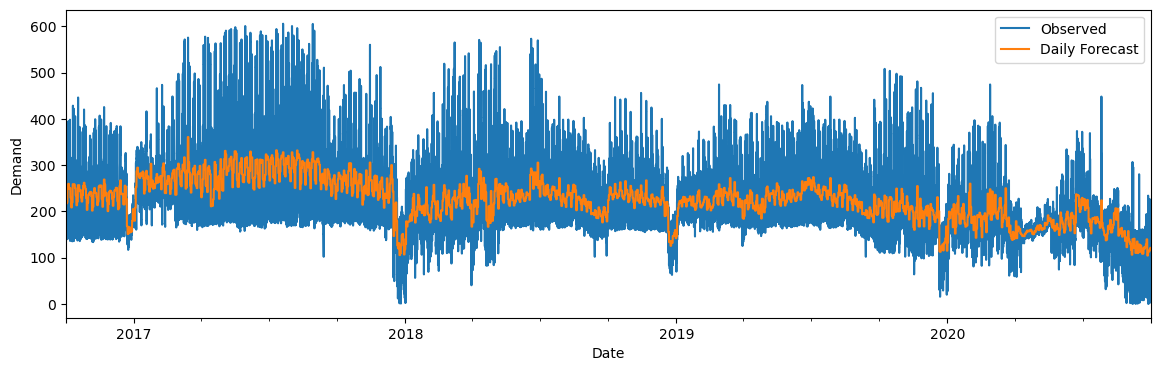

In [152]:
ax = ARIMA_predict_df['Building0'].plot(label='Observed')
ARIMA_predict_df['Building0_daily_predict'].plot(ax=ax, label='Daily Forecast', figsize=(14, 4))
ax.set_xlabel('Date')
ax.set_ylabel('Demand')
plt.legend()
plt.show()